In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Empezamos arrancando una corrida de 'sim2d'. Aqui suponemos que se ejecuta el siguiente mando en
una terminal:

./sim2d gal1.par

Esto crea la carpeta 'out/gal1' donde se escriben los datos. Toma algo de tiempo. Una vez que se termina la corrida, examinamos las salidas.

In [2]:
dir='out/gal1'    # Esta cadena contiene la carpeta de salida

In [5]:
size = loadtxt(dir+"/dims.dat")   # Buscamos el tamanyo de las mallas (stardens, potential)
nx=int(size[0])
ny=int(size[1])
print (nx,ny)

128 128


Observamos que este tamanyo es la mitad del declarado en 'gal1.par' con las variables XSIZE y YSIZE. Se debe a la tecnica de supresion de los efectos de marea de aliases, como se platico en clase.

Definimos una funcion que lee en un arreglo una salida de tipo malla:

In [17]:
def GetMesh (dir='.',nb=0,radix='stardens'):
    size = loadtxt(dir+"/dims.dat")   # Buscamos el tamanyo de las mallas (stardens, potential)
    nx=int(size[0])
    ny=int(size[1])
    mesh = fromfile(dir+'/'+radix+str(nb)+'.dat',dtype='float32').reshape(ny,nx)
    return mesh

Examinemos las condiciones iniciales, es decir la salida numero cero.

In [18]:
dens0 = GetMesh (dir=dir,nb=0)

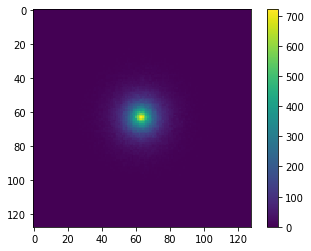

In [19]:
imshow(dens0);colorbar()

La densidad es dada en masas solares por parsec cuadrado. Cerca del centro alcanza (casi) el valor de 800, que es la densidad central prescrita con la variable SIGMA0 en `gal1.par`. Vamos a cambiar el valor maximo de la paleta de colores para ver regiones mas externas. Ademas graficamos la raiz cuadrada de la densidad en lugar de la densidad misma, para resaltar las partes externas, donde la densidad es la mas pequenya.

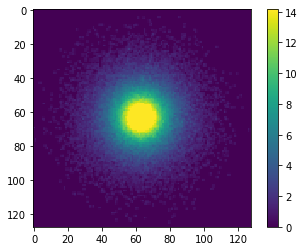

In [20]:
imshow(sqrt(dens0),vmax=sqrt(200));colorbar()

Se aprecia cierto ruido en las regiones externas: hay pocas estrellas, y entonces, en proporcion, la fluctuacion de densidad entre una celda y sus vecinas es mas grande.

Examinemos ahora al potencial correspondiente a esta distribucion de densidad.

In [21]:
pot0 = GetMesh (dir=dir,nb=0,radix='potential')

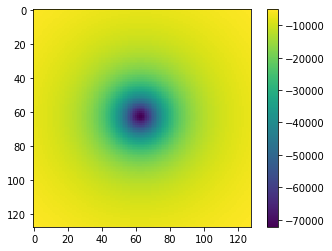

In [22]:
imshow(pot0);colorbar()

Se aprecian dos cosas: (i) el potencial es negativo (es normal, es un pozo de potencial), este pozo siendo mas profundo en el centro y (ii) no se aprecia ningun ruido incluso en las partes externas. Es normal: el potencial resulta de la convolucion de la densidad por $-G/r$, que tiende a borrar el ruido a pequenyas escalas.

No solamente se escriben las mallas, sino tambien las posiciones y velocidades de todas las "estrellas". Escribimos una funcion para leerlas.

In [24]:
def GetStars (dir='.',nb=0):
    stars = loadtxt(dir+"/stars"+str(nb)+".dat")
    return stars

In [25]:
stars0 = GetStars (dir=dir,nb=0)

In [27]:
stars0[0,:]

array([-11338.249023,  12925.695312,   -151.64183 ,   -118.052307])

En la celda anterior acabamos de escribir las variables de la estrella numero 0. De izquierda a derecha son `x`, `y`, `vx` y `vy`. Las unidades son respectivamente parsec y parsec/Myr, que por coincidencia es casi lo mismo que km/s.

Extraemos las coordenadas (x,y) de todas las estrellas:

In [28]:
x = stars0[:,0]
y = stars0[:,1]

Las graficamos:

(-41667.09160185, 41625.290820849994, -38998.96347655, 40595.88925755)

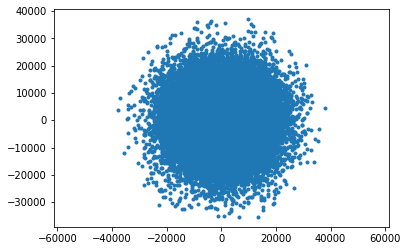

In [31]:
plot(x,y,'.')
axis("equal")

La parte interna esta muy saturada porque los puntos representativos de las estrellas se solapan. Podemos unsar un solo pixel para graficar las estrellas, en lugar del simbolo de arriba que es un pequenyo disco de varios pixeles.

(-41667.09160185, 41625.290820849994, -38998.96347655, 40595.88925755)

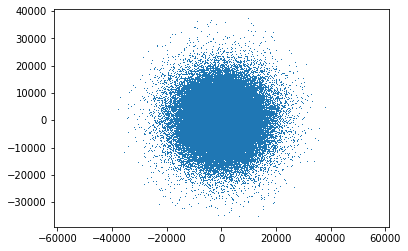

In [32]:
plot(x,y,',')
axis("equal")

Otro metodo para alcanzar a ver las regiones mas internas consiste en graficar una de cada diez estrellas (por ejemplo):

(-41482.072461200005, 37739.8888672, -34735.3482427, 40392.8599607)

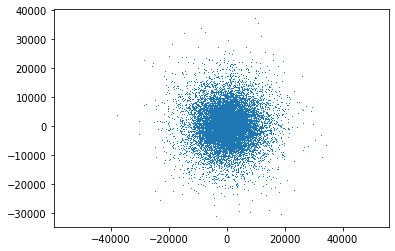

In [34]:
plot(x[::10],y[::10],',')
axis("equal")

Otro metodo puede consistir en usar una figura mas grande (con el mando `figsize`) para alejar las estrellas una de la otra y asi evitar que se superpongan tanto.

Existe un archivo que se escribe una sola vez, antes de que empiece la iteracion. Se llama `angular.dat`. Vamos a examinar su contenido.

In [35]:
angular = loadtxt(dir+"/angular.dat")

In [36]:
angular[0,:]

array([6.000000e+01, 9.486402e+00, 1.581070e-01, 3.442000e-02,
       2.817940e-01, 6.246983e+01, 7.931440e+01, 1.300000e+00])

Cada renglon contiene (vease la celda anterior que muestra el primer renglon):

- radio (parsec)

- velocidad (lineal) en pc/Myr o km/s para ese radio

- velocidad (angular) $\Omega$ para ese radio (km/s/Myr o Myr^-1)

- $\Omega-\kappa/2$ donde $\kappa$ es la frecuencia epiciclica

- $\Omega+\kappa/2$

- La dispersion radial $\sigma_r$ de velocidad (km/s o pc/Myr)

- La dispersion total de velocidad horizonal

- El parametro de Toomre del disco (vease clase).


Text(0, 0.5, 'v(r) [km/s]')

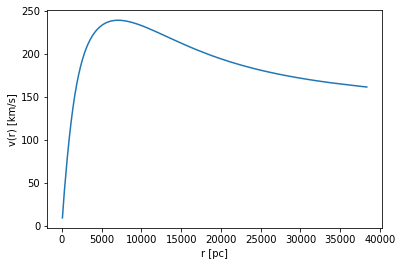

In [39]:
plot(angular[:,0],angular[:,1])#
xlabel("r [pc]")
ylabel("v(r) [km/s]")

Vemos en la curva de arriba la tendencia de las galaxias a tener una curva de rotacion plana en su parte exterior.

## Galaxia a $t > 0$

In [42]:
st500=GetMesh(dir=dir,nb=10)   # surface densidy mesh after 500 Myr

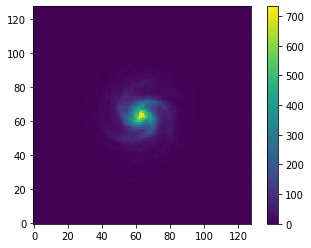

In [45]:
imshow(st500,origin='lower')
colorbar()

Notamos la aparicion espontanea de 3 brazos espirales en la parte central. Cambiamos el valor maximo y graficamos la raiz cuadrada para resaltar las partes externas:

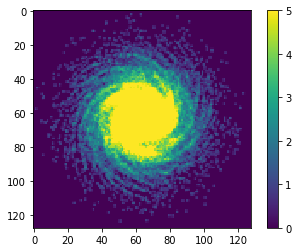

In [46]:
imshow(sqrt(st500),vmax=5);colorbar()

Vemos muchos brazos delgados en la parte externa. Son transitorios y se deben al mecanismo SWING (vease clase).

In [47]:
pot500 = GetMesh (dir=dir,nb=10, radix='potential')

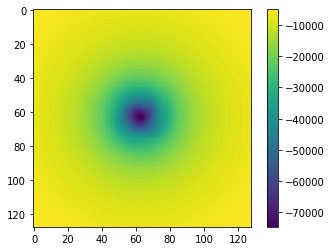

In [48]:
imshow(pot500);colorbar()

Potencial correspondiente. Apenas se notan los brazos espirales.

Veamos ahora las estrellas:

In [51]:
st500 = GetStars(dir=dir,nb=10)
x=st500[:,0]
y=st500[:,1]

(-41212.48945365, 49355.95039065, -40213.161327600006, 39980.9035156)

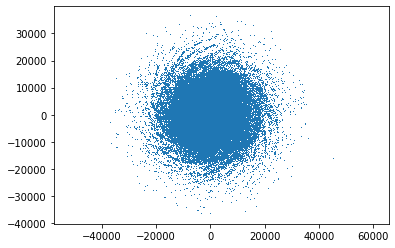

In [52]:
plot(x,y,',')
axis("equal")

(-33475.266113000005,
 34470.971191000004,
 -37542.950390900005,
 37814.637890900005)

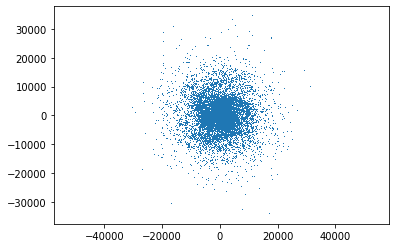

In [55]:
plot(x[::15],y[::15],',')
axis("equal")

Sugerencias para seguir explorando tanto esta corrida como el codigo:

- Examinar salidas a tiempos ulteriores

- Repetir la corrida con el parametro `Symmetry` en YES en lugar de NO. Que podemos observar ?

- Cambiar el parametro `ToomreCentral`. Que pasa si es mas grande ? Mas pequenyo ?

- Agregar una masa central de 3e9 masas solares (representando un hoyo negro supermasivo)

- Escribir un ciclo que produzca imagenes `png` de las estrellas para cada salida y usarlas para producir una animacion.